## Comparing of Reanalysis and Forecast Data  

Before performing following notebook, please regrid the ERA5 data on the same grid as the forecast data. This can be proceeded by using Cdo and the following command line: cdo remapbil,enfo_pf_2024_05_13.nc era5_18_19may.nc era5_regrid.nc (cdo remapbil,target.nc input.nc output.nc). 

In [1]:
# import modules and functions
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
from shapely import geometry
import pandas as pd

import os
import sys
base_path = os.getcwd()
sys.path.append(os.path.join(base_path,'/Weather_forecast_case_study/src')) # be sure that your git is cloned in your execution path of Jupyter
from functions import df, plots

ModuleNotFoundError: No module named 'functions'

In [2]:
# if the import of functions is not working (several times changing the jupyter kernel helps), try this:
import os
import sys

base_path = os.getcwd()

source_path = os.path.join(base_path, 'Weather_forecast_case_study', 'src')

if source_path not in sys.path:
    sys.path.append(source_path)

print("Aktueller sys.path:")
for p in sys.path:
    print(p)

# try to import functions from functions.py
try:
    from functions import df, plots
    print("Modul 'functions' erfolgreich importiert")
except ModuleNotFoundError as e:
    print(f"Fehler: {e}")


Aktueller sys.path:
/opt/tljh/user/envs/py311_esdp/lib/python311.zip
/opt/tljh/user/envs/py311_esdp/lib/python3.11
/opt/tljh/user/envs/py311_esdp/lib/python3.11/lib-dynload

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages
/Weather_forecast_case_study/src
/home/jupyter-lreske/Weather_forecast_case_study/src
Modul 'functions' erfolgreich importiert


In [3]:
plotter = plots()

In [4]:
# read in the data
source_files = df.get_source_files([".nc", ".nc4"], cf_or_pf="pf")
list_of_files_pf = []
for source_file in source_files:
    list_of_files_pf.append(xr.open_dataset(source_file))

source_files = df.get_source_files(['.nc'], cf_or_pf='era')
list_of_files_era = []
for source_file in source_files:
    list_of_files_era.append(xr.open_dataset(source_file))

## Calculate mean of perturbed forecast and difference with ERA5

In [5]:
# define a region 
lat_min = 47.
lat_max = 55.
lon_min = 5.
lon_max = 15.5

# and a date
date = '2024-05-18'

In [6]:
region_data_mean = []
for file in list_of_files_pf:
    file_mean = file.mean(dim='number')
    extract_datafile = plotter.extract_region(file_mean, lat_min, lat_max, lon_min, lon_max)
    region_data_mean.append(extract_datafile)

In [7]:
era = plotter.extract_region(list_of_files_era[0], lat_min, lat_max, lon_min, lon_max)


/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

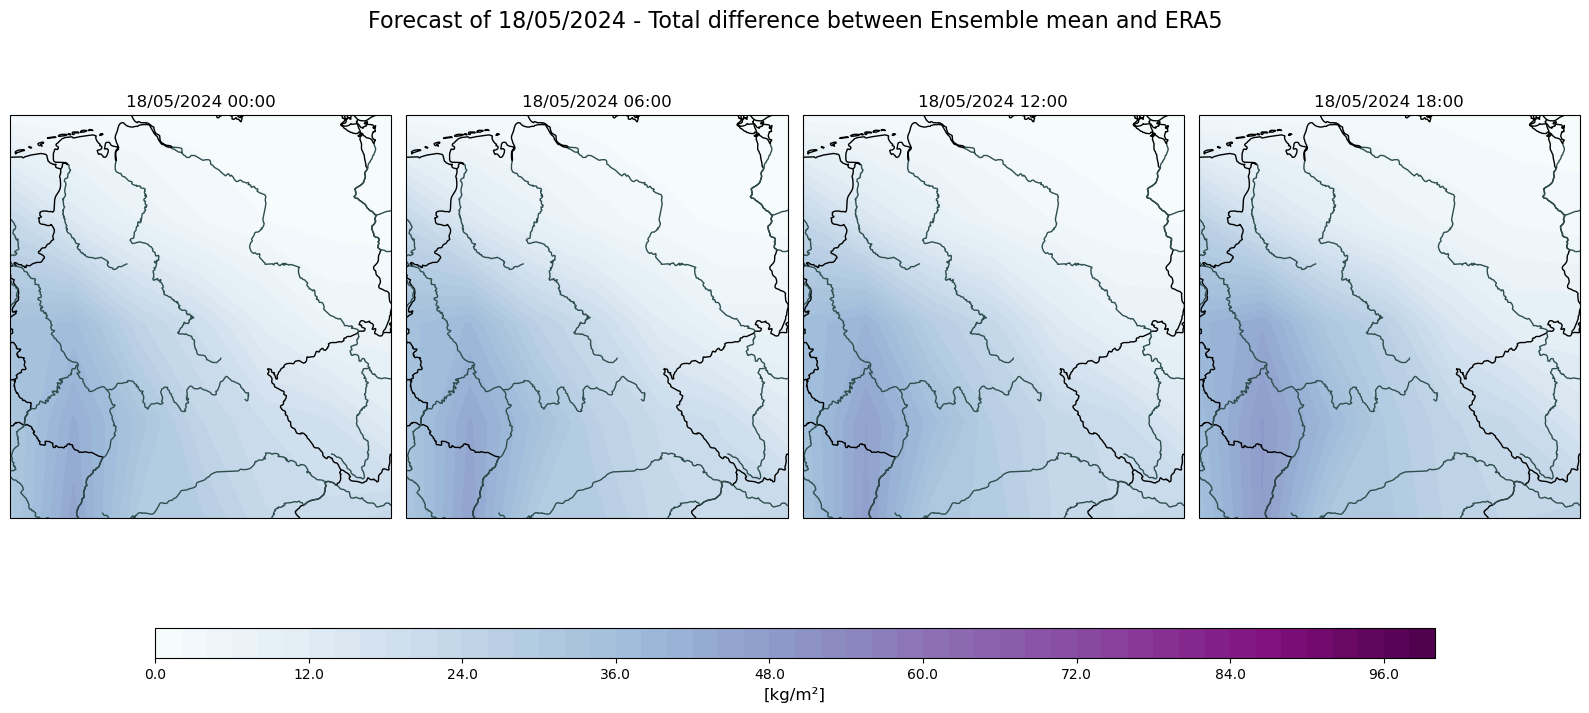

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

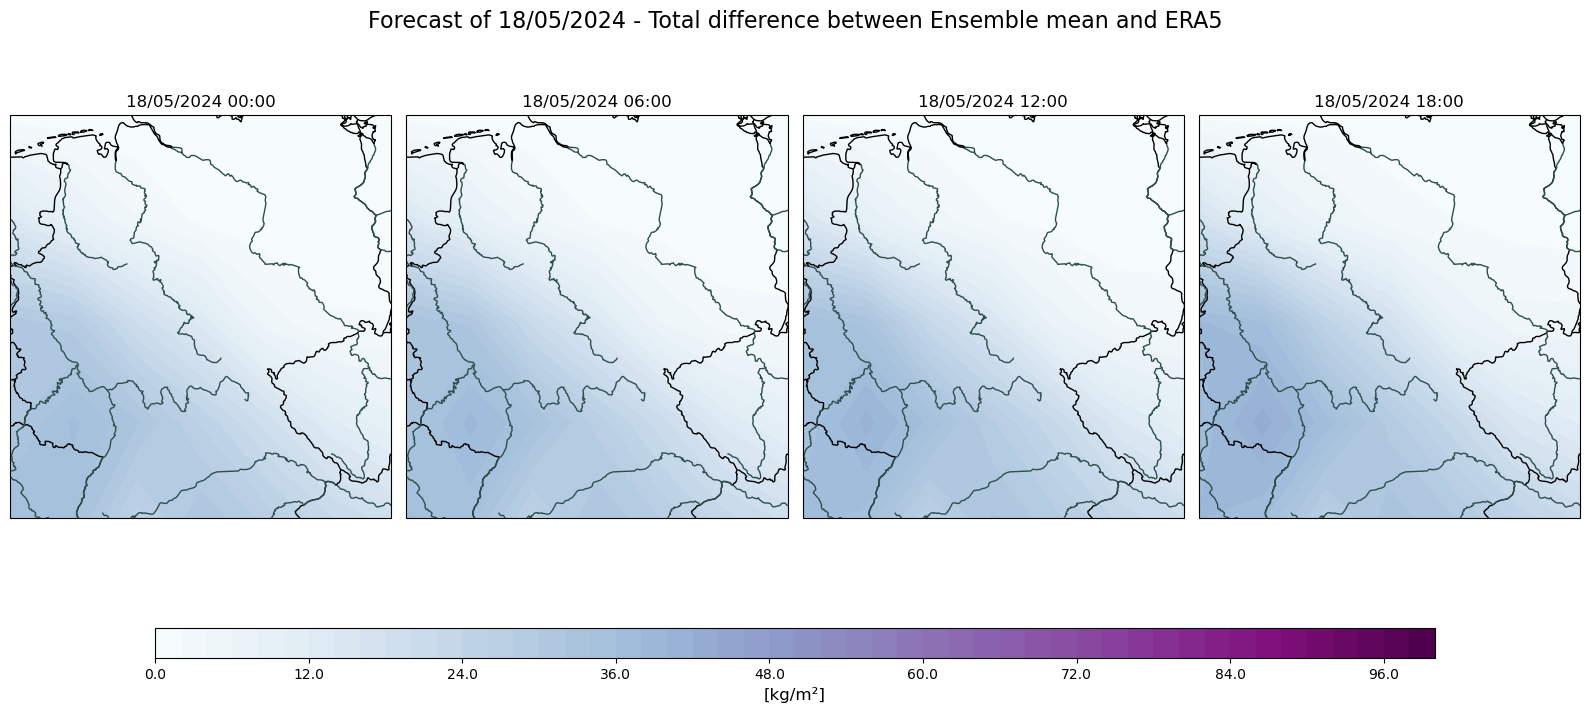

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

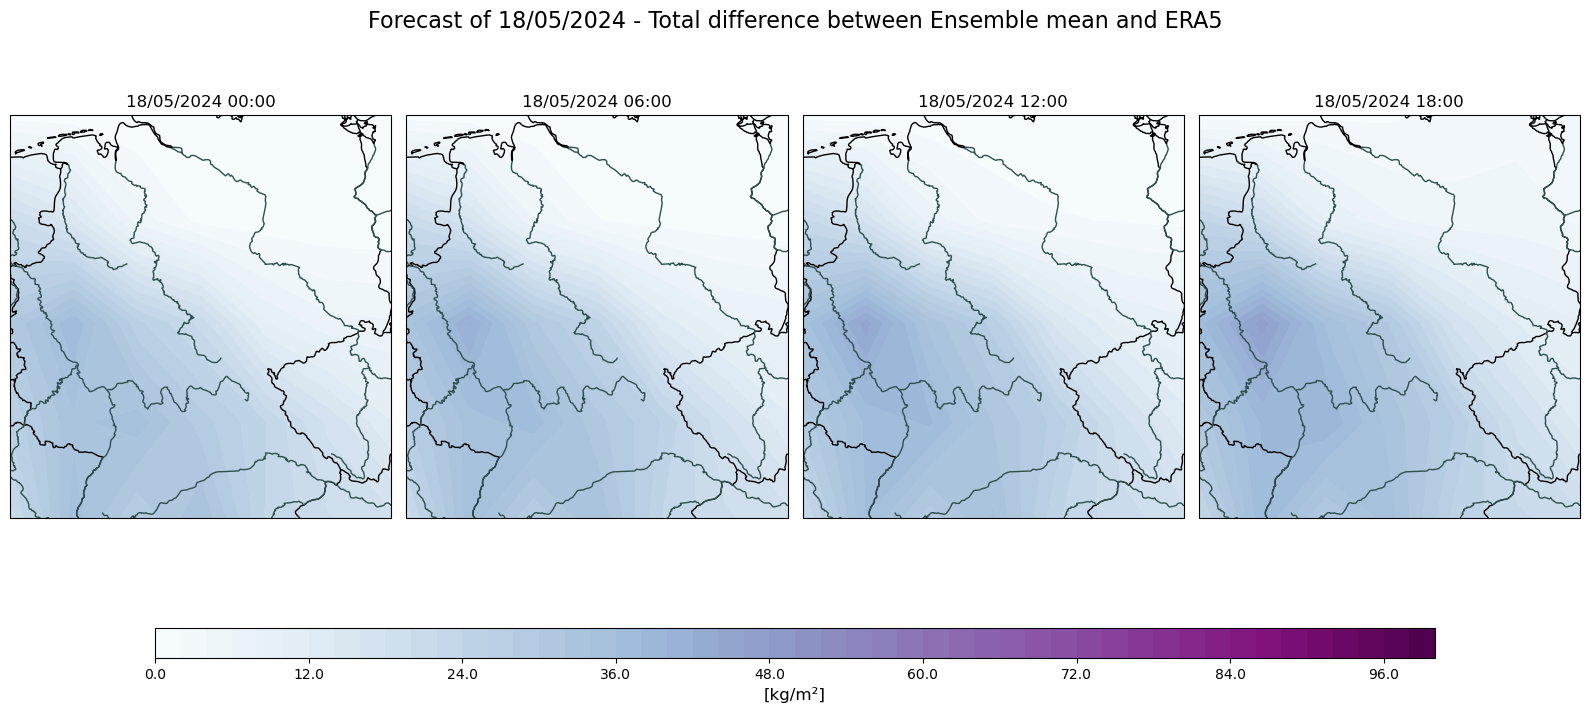

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

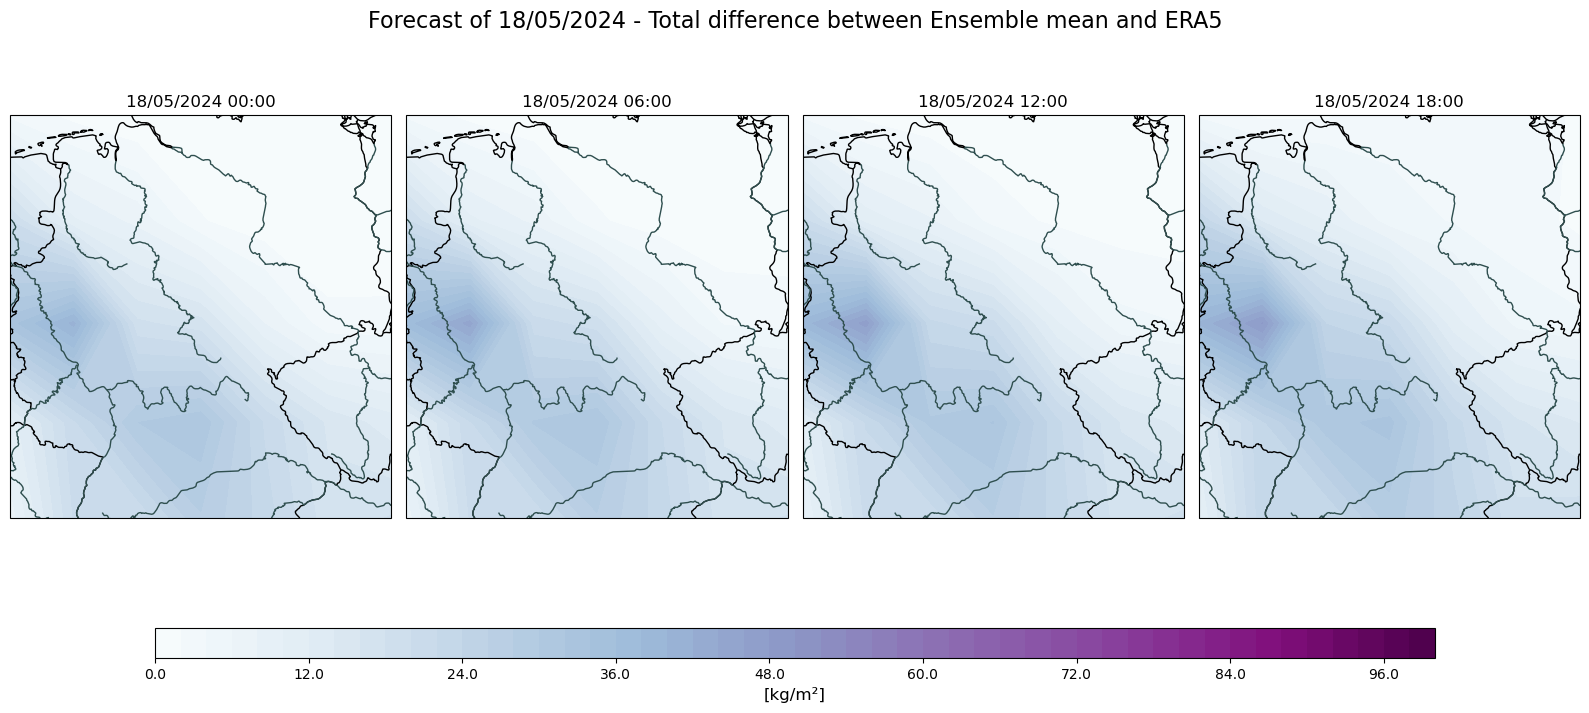

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

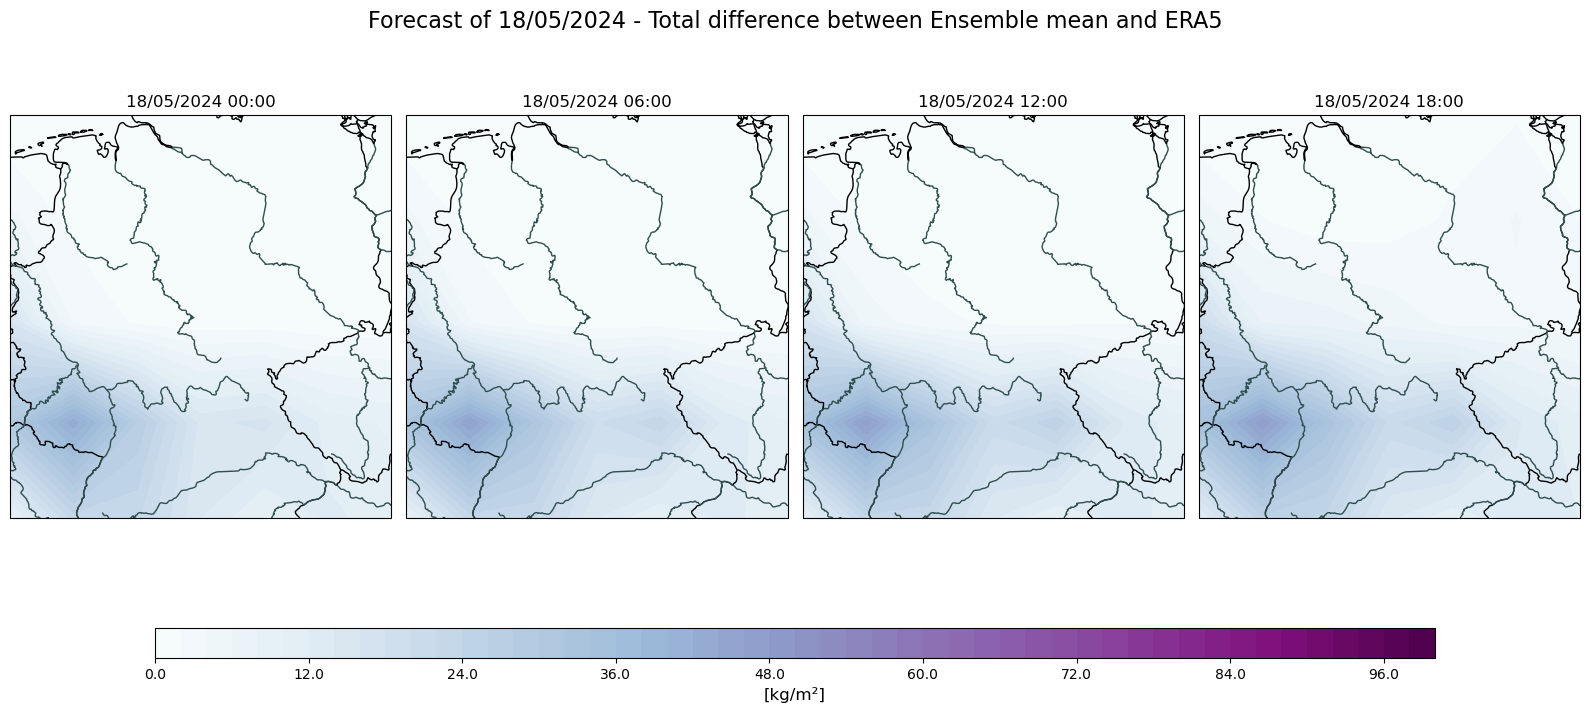

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/Weather_forecast_case_study/src

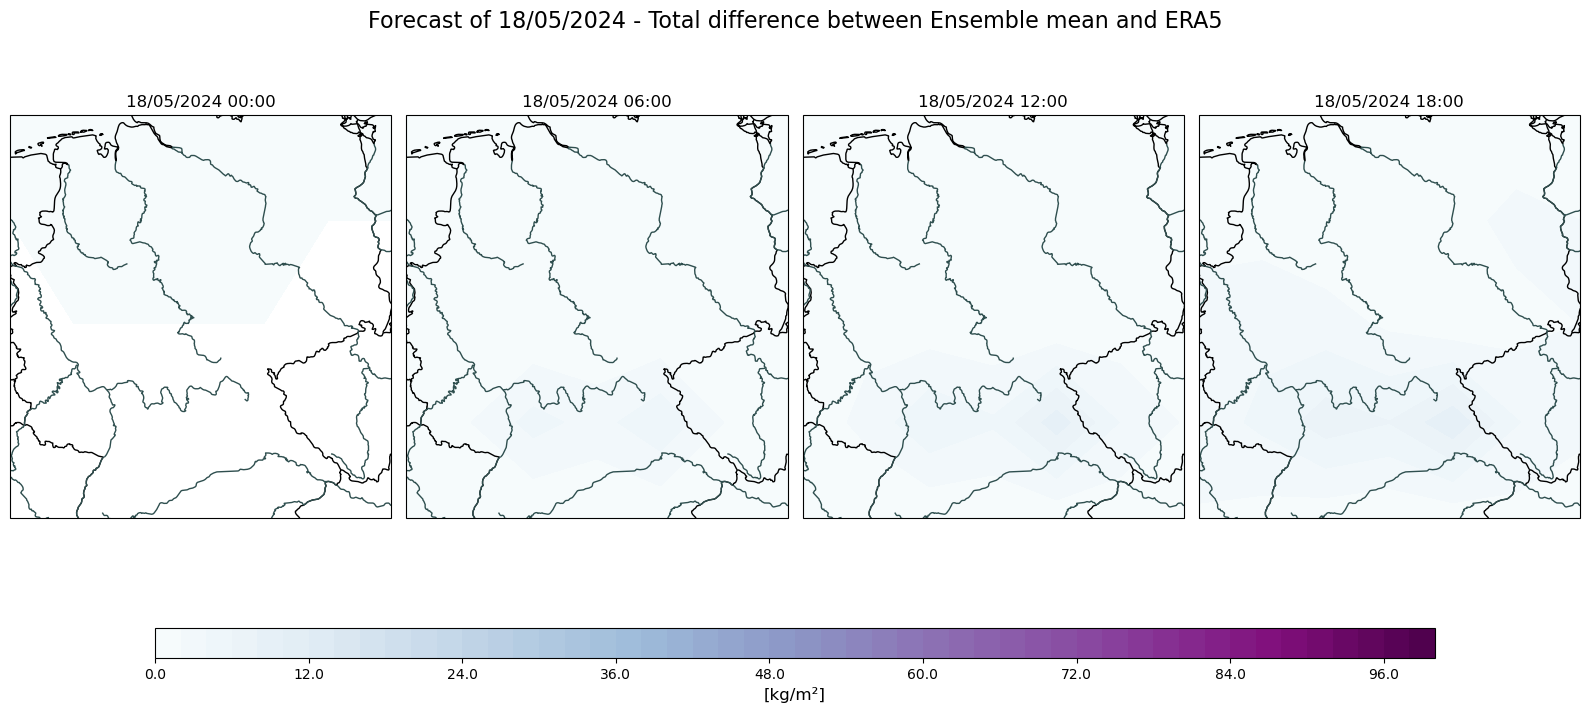

In [8]:
# plot difference between era5 and ensemble mean
comment = 'Total difference between Ensemble mean and ERA5'
for region in region_data_mean:
    diff = region - era
    plotter.plot_map_tp(diff, date, addtitle=comment)